# DS 3000 - Assignment 4

**Student Name**: Bella chin

**Date**: 09/24/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

 Load the data directly from the url into a dataframe. Here is the link to the data: https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xOLinks to an external site.



In [3]:
# import pandas
import pandas as pd
import numpy as np

# Load the data from url into dataframe
treatment_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO')

# view samples of data
treatment_df.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35


## Question 2: 
Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 

In [5]:
# check the types of all the variables
print('The types of all variables before converting:\n' ,treatment_df.dtypes)

print(treatment_df['County of Program Location'].value_counts())
# convert fields to best possible type
treatment_df['County of Program Location']= treatment_df['County of Program Location'].astype('category')
treatment_df['Program Category']= treatment_df['Program Category'].astype('category')
treatment_df['Service Type']= treatment_df['Service Type'].astype('category')
treatment_df['Age Group']= treatment_df['Age Group'].astype('category')
treatment_df['Primary Substance Group']= treatment_df['Primary Substance Group'].astype('category')
print('\nConverting fields to best possible type: \n', treatment_df.dtypes)

# check if any null values
print(treatment_df.isnull().sum())

# impute the missing value to the most common primary substance group
treatment_df['Primary Substance Group'] = treatment_df['Primary Substance Group'].fillna(treatment_df['Primary Substance Group'].mode()[0])

# check if any null values after
print(treatment_df.isnull().sum())


The types of all variables before converting:
 Year                           int64
County of Program Location    object
Program Category              object
Service Type                  object
Age Group                     object
Primary Substance Group       object
Admissions                     int64
dtype: object
County of Program Location
New York    5087
Suffolk     3938
Queens      3752
Erie        3598
Dutchess    3592
            ... 
Wyoming      360
Tioga        354
Schuyler     352
Yates        338
Lewis        137
Name: count, Length: 61, dtype: int64

Converting fields to best possible type: 
 Year                             int64
County of Program Location    category
Program Category              category
Service Type                  category
Age Group                     category
Primary Substance Group       category
Admissions                       int64
dtype: object
Year                          0
County of Program Location    0
Program Category              0
S

## Question 3:
Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you choose an appropriate graph based on the type of data. Explain each chart.

In [7]:
# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


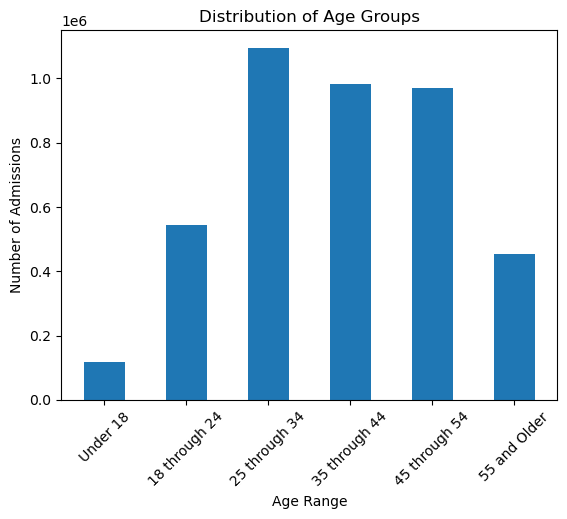

In [8]:
# distribution of age groups

# get the sum of admissions for each age group
admissions_under_18 = treatment_df[treatment_df['Age Group'] == 'Under 18']['Admissions'].sum()
admissions_18_to_24 = treatment_df[treatment_df['Age Group'] == '18 through 24']['Admissions'].sum()
admissions_25_to_34 = treatment_df[treatment_df['Age Group'] == '25 through 34']['Admissions'].sum()
admissions_35_to_44 = treatment_df[treatment_df['Age Group'] == '35 through 44']['Admissions'].sum()
admissions_45_to_54 =treatment_df[treatment_df['Age Group'] == '45 through 54']['Admissions'].sum()
admissions_over_55 = treatment_df[treatment_df['Age Group'] == '55 and Older']['Admissions'].sum()


ageList = [admissions_under_18, admissions_18_to_24,admissions_25_to_34, admissions_35_to_44, admissions_45_to_54, admissions_over_55 ]
ageGroup = ['Under 18', '18 through 24', '25 through 34', '35 through 44', '45 through 54', '55 and Older']

# create the bar chart
plt.bar(ageGroup, ageList, width = .5)
plt.xticks(rotation = 45)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Number of Admissions')
plt.show()


This bar chart shows the amount of admissions for each age group. The most admissions are clearly shown to be ages: 25 thorugh 34 and the least admissions are ages under 18. The difference between the lowest number of admissions and the highest number of admissions is very significant. The middle aged groups (25-54) have the highest amount of admissions compared to the younger and older groups.

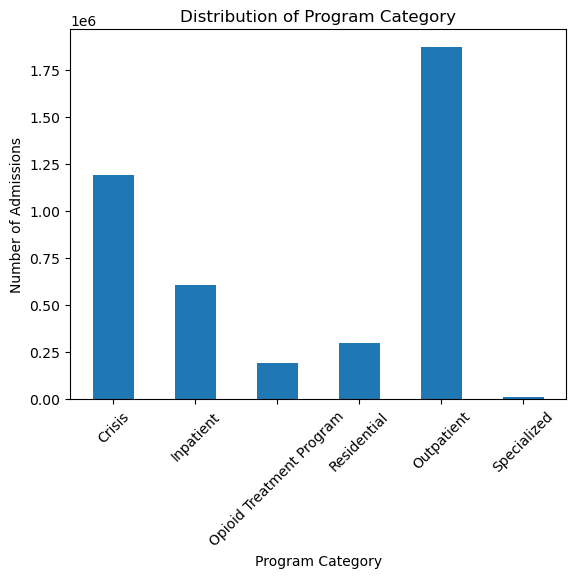

In [10]:
# distribution of program category

# get the sum of admissions for each program category
crisis_admission = treatment_df[treatment_df['Program Category'] == 'Crisis']['Admissions'].sum()
inpatient_admission = treatment_df[treatment_df['Program Category'] == 'Inpatient']['Admissions'].sum()
opioid_admission = treatment_df[treatment_df['Program Category'] == 'Opioid Treatment Program']['Admissions'].sum()
residential_admission = treatment_df[treatment_df['Program Category'] == 'Residential']['Admissions'].sum()
outpatient_admission =treatment_df[treatment_df['Program Category'] == 'Outpatient']['Admissions'].sum()
specialized_admission = treatment_df[treatment_df['Program Category'] == 'Specialized']['Admissions'].sum()


ageList = [crisis_admission, inpatient_admission, opioid_admission, residential_admission, outpatient_admission, specialized_admission]
ageGroup = ['Crisis', 'Inpatient', 'Opioid Treatment Program', 'Residential', 'Outpatient', 'Specialized']

# create the bar chart
plt.bar(ageGroup, ageList, width = .5)
plt.xticks(rotation = 45)
plt.title('Distribution of Program Category')
plt.xlabel('Program Category')
plt.ylabel('Number of Admissions')
plt.show()


This bar chart shows the amount of admissions for each program category.The most admissions are clearly shown to be for outpatient and the least admissions are for specialized. Again, the difference between the highest amount of admissions and lowest amount are very significant as well. Outpatient Program is the most popular according to the number of admissions while specialized programs are the lowest. Every other program is not as popular as outpatient, although crisis is the closest to outpatient in terms of admissions.

Primary Substance Group
Alcohol          19986
Heroin           19430
Other Opioids    16781
Cocaine          16278
Marijuana        14069
All Others       12823
Name: count, dtype: int64


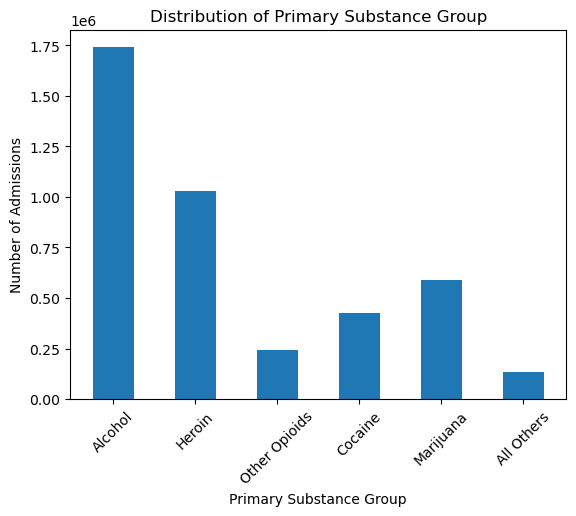

In [12]:
# distribution of primary substance group
print(treatment_df['Primary Substance Group'].value_counts())

# get the sum of admissions for each primary substance group
alc_admission = treatment_df[treatment_df['Primary Substance Group'] == 'Alcohol']['Admissions'].sum()
heroin_admission = treatment_df[treatment_df['Primary Substance Group']  == 'Heroin']['Admissions'].sum()
other_admission = treatment_df[treatment_df['Primary Substance Group']  == 'Other Opioids']['Admissions'].sum()
cocaine_admission = treatment_df[treatment_df['Primary Substance Group']  == 'Cocaine']['Admissions'].sum()
marijuana_admission = treatment_df[treatment_df['Primary Substance Group'] == 'Marijuana']['Admissions'].sum()
allothers_admission = treatment_df[treatment_df['Primary Substance Group']  == 'All Others']['Admissions'].sum()


ageList = [alc_admission, heroin_admission, other_admission, cocaine_admission, marijuana_admission, allothers_admission]
ageGroup = ['Alcohol', 'Heroin', 'Other Opioids', 'Cocaine', 'Marijuana', 'All Others']

# create the bar chart
plt.bar(ageGroup, ageList, width = .5)
plt.xticks(rotation = 45)
plt.title('Distribution of Primary Substance Group')
plt.xlabel('Primary Substance Group')
plt.ylabel('Number of Admissions')
plt.show()

This bar chart shows the amount of admissions for each primary substance group. The most admissions are clearly shown to be for alcohol and the least admissions are for all other primary substance group. This bar chart shows that throughout all the counties, alcohol is the most popular in terms of admissions, while all others is the lowest, with other opioids coming in a close second for the lowest. 

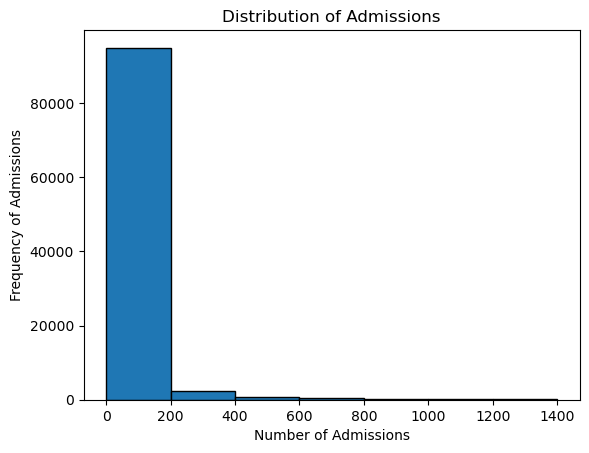

In [14]:
# create the histogram 
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
plt.hist(treatment_df['Admissions'], bins = bins, edgecolor = 'black')
plt.title('Distribution of Admissions')

plt.xlabel('Number of Admissions')
plt.ylabel('Frequency of Admissions')
plt.show()

This histogram shows the distribution of admissions. The majority of admissions fall between 0 and 200, as indicated by the massive bar compared to the rest. There are very few admissions greater than 200, with the histogram significantly dropping after 200. Only a small number of admissions reach the higher number of admissions.

## Question 4
Create a function called annualAdmissions() that calculates the total number of reported admissions that transpired each year, for the entire state of NY and display the results using a line chart. Annotate the chart to show the year with the highest number of admissions.
Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed over time.


In [17]:
# function that calculates total num of admissions for each year in NY
def annualAdmissions():
    # extract the events that only occurred in NY
    annual_admissions = treatment_df[treatment_df['County of Program Location'] == 'New York']
    # group admissions by year and calculate total number admissions for each year
    annual_admissions = annual_admissions.groupby(['Year'], as_index = False)['Admissions'].sum()

    # find highest num of admissions
    max_admissions = annual_admissions['Admissions'].max()
    max_year = annual_admissions[annual_admissions['Admissions'] == max_admissions]['Year'].values[0]


    #plot line chart
    annual_admissions.plot(x = 'Year', y = 'Admissions')
    # used mat plot lib annotate doc
    plt.annotate('Highest number of admissions:', xy = (max_year, max_admissions), 
                 arrowprops = dict (facecolor = 'black', shrink = 0.05))
    plt.title('Total Annual Reported Admissions in NY')
    plt.ylabel('Number of Admissions')
    plt.show()


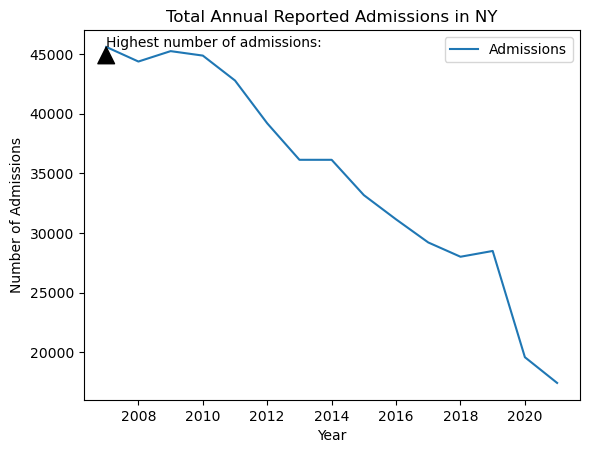

In [18]:
annualAdmissions()

The line plot represents the total annual admissions in New York over the years. There is a clear upward trend until around 2017-2018, where the number of admissions were the highest. After this peak, admissions dropped significantly. Between, 2011 and 105, there were fluctuations with a decline, which was followed by an incline in admissioons. This may reflect changes in usage of primary substances during this time period. The sharp rise leading up to 2017 and 2018 may indicate a increase in need for treatment and usage of primary substances.

## Question 5
Create a function called annualAdmissionsByCounty(year). The function should take the year as input, filter the data to find all admissions for that year and calculate the proportion of admissions grouped by county. For example, if the year is 2007, the function should calculate the admissions as follows: county A 75%, county B 20% and county C 2.5%, etc. Display a bar chart with the top 10 counties. Using a new cell, visualize the annualAdmissionsByCounty() for the last 10 years. What are the patterns that you have observed?
Note: Ensure that you visualize the results.

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


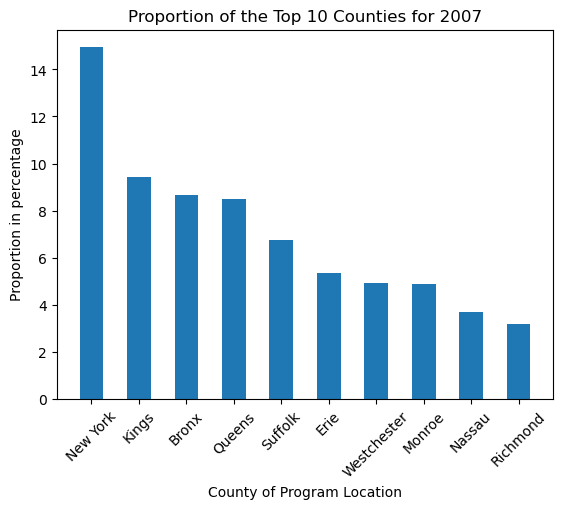

In [21]:
# function that filters by year and calculate proportion of admissions grouped by county
def annualAdmissionsByCounty(year):
    # will extract events that only occurred in the year
    annual_admissions_by_county = treatment_df[treatment_df['Year'] == year]
    # group admissions by county
    annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()

    # get sum of all admissions 
    annual_sum = annual_admissions_by_county['Admissions'].sum()
    # get proportion of admissions grouped by county
    annual_admissions_by_county['Proportion'] = ((annual_admissions_by_county['Admissions'] / annual_sum) * 100).round(2)
    # sort the admissions
    sorted = annual_admissions_by_county.sort_values('Proportion', ascending = False)
    top10County = sorted.head(10)
    #create bar chart
    plt.bar(top10County['County of Program Location'], top10County['Proportion'], width = .5)
    plt.xticks(rotation = 45)
    plt.title(f'Proportion of the Top 10 Counties for {year}')
    plt.xlabel('County of Program Location')
    plt.ylabel('Proportion in percentage')
    plt.show()

    
annualAdmissionsByCounty(2007)

For the year of 2007, New York has the highest proportion percentage, with a significant difference from the second highest proportion. This may indicate that New York has a big primary substance issue and many people seek help for these issues. Richmond has the lowest with under 4% which is a big difference compared to New York's over 1

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


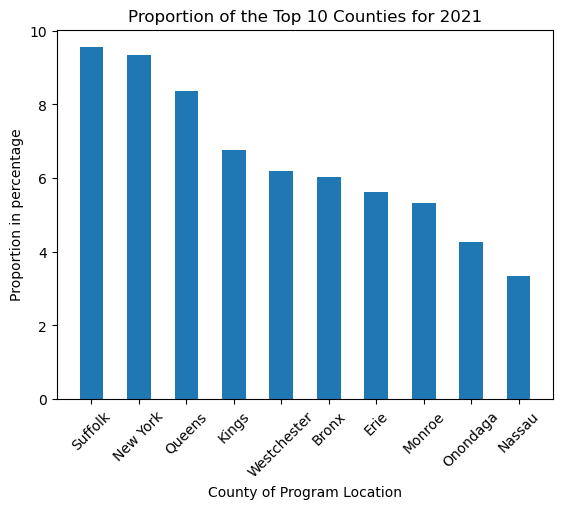

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


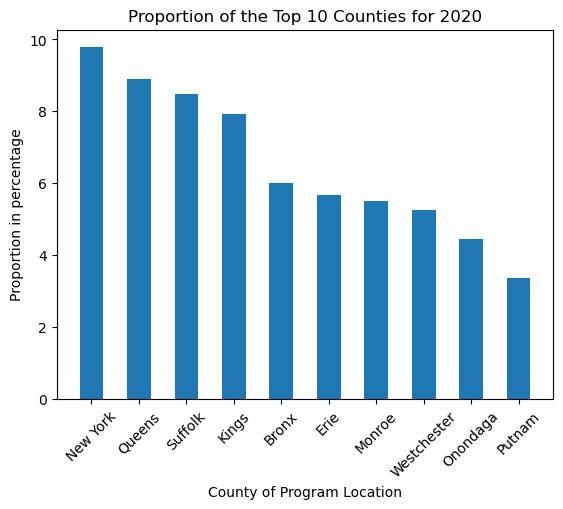

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


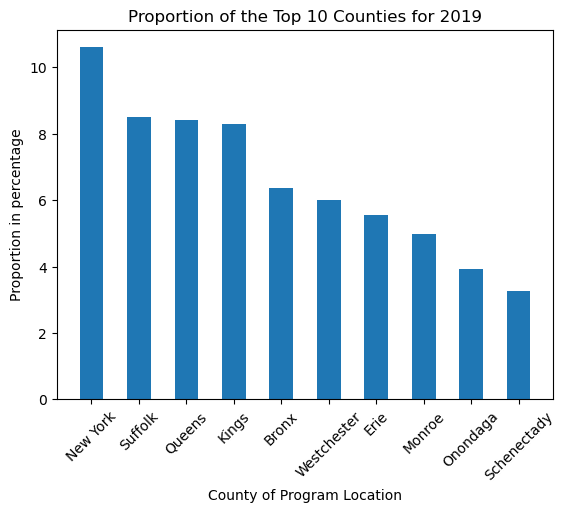

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


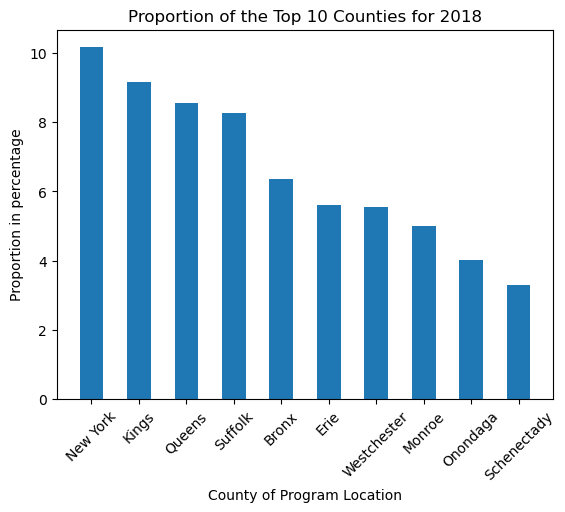

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


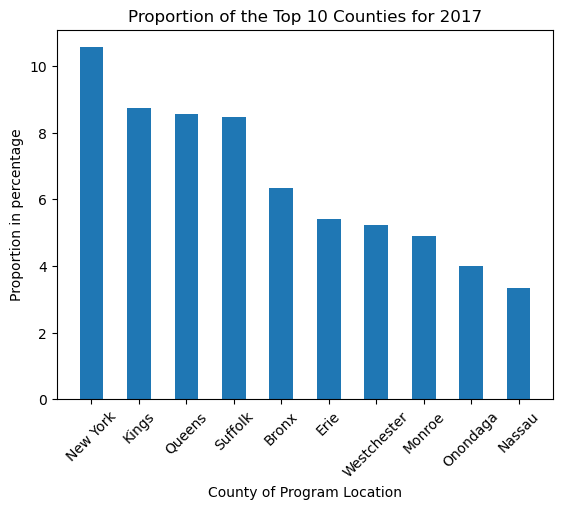

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


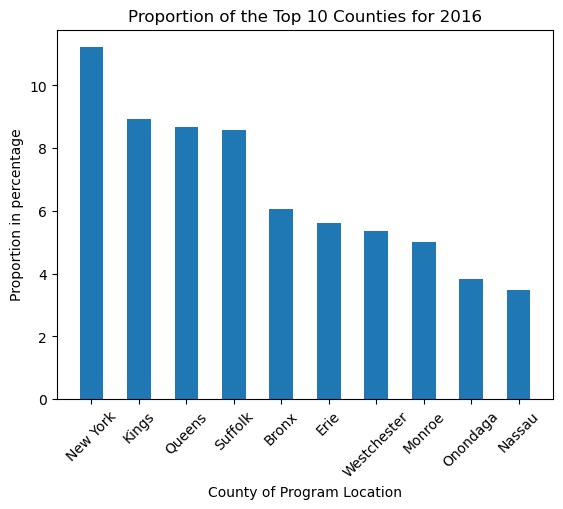

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


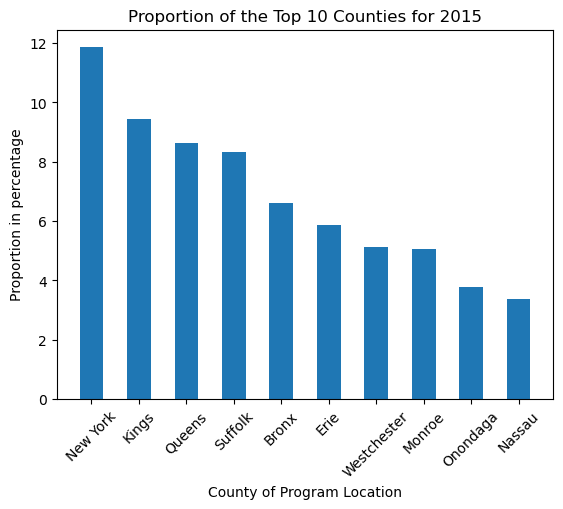

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


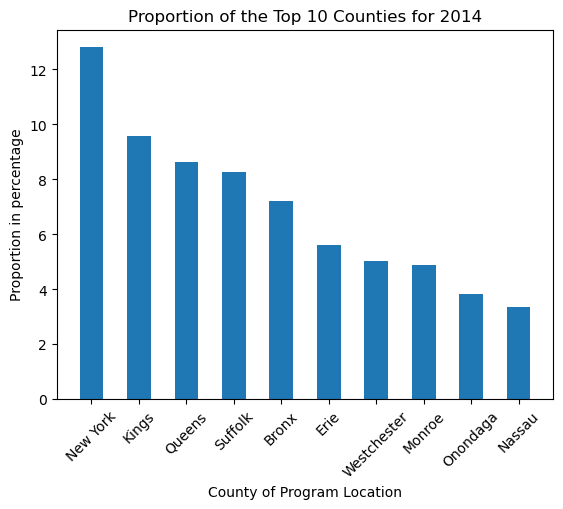

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


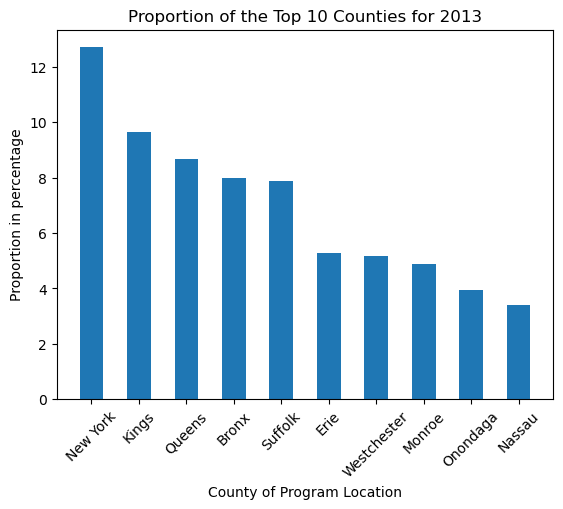

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/891382950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_admissions_by_county  = annual_admissions_by_county.groupby(['County of Program Location'], as_index = False)['Admissions'].sum()


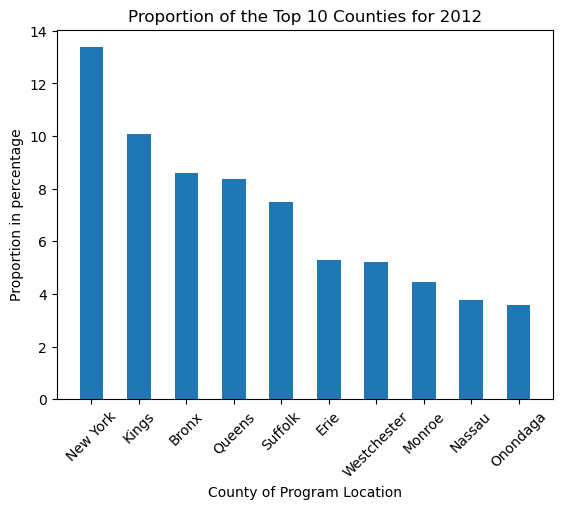

In [22]:
# sort values based on year with the latest year first
sorted_year = treatment_df.sort_values('Year', ascending = False)['Year']
# drop duplicate years
sorted_year.drop_duplicates(inplace = True)
# get only the last 10 years
last_10_years = list(sorted_year.head(10))
# call function to view top 10 counties for last 10 years
for year in last_10_years:
    annualAdmissionsByCounty(year)

For the last 10 years, New York has been the biggest proportion of admissions for the year besides for 2021. This may indicate a decrease in the usage of primary substances in this year. Suffolk slowly increased their proportion of admissions over the last 10 years, making its way to the top proportion of 2021. Erie varied throughout the last 10 years with either high proportions or low proportions. New York, Suffolk, Erie, Queens, Kings, Bronx, Onondaga, and Monroe have been in the top 10 counties that had the highest proportion of admissions for all 10 years, which may indicate a very significant and continuous usage of primary substances in these counties. Nassau had been in the top 10 counties that had the highest proportion of admissions for 9 out of the 10 years, which is the only county that was the next most present throughout the last 10 years besides 2018. This may indicate that the primary substance usage in this year decreased. 

## Question 6
Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/1652753293.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_substance_count = rehab_admissions.groupby(['Age Group', 'Primary Substance Group'], as_index = False)['Admissions'].sum()
/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/1652753293.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prominent_substance = age_substance_count.loc[age_substance_count.groupby('Age Group')['Admissions'].idxmax()]


        Age Group Primary Substance Group  Admissions
3   18 through 24                  Heroin       31583
9   25 through 34                  Heroin       67720
12  35 through 44                 Alcohol       78199
18  45 through 54                 Alcohol      104903
24   55 and Older                 Alcohol       56801
34       Under 18               Marijuana       14118


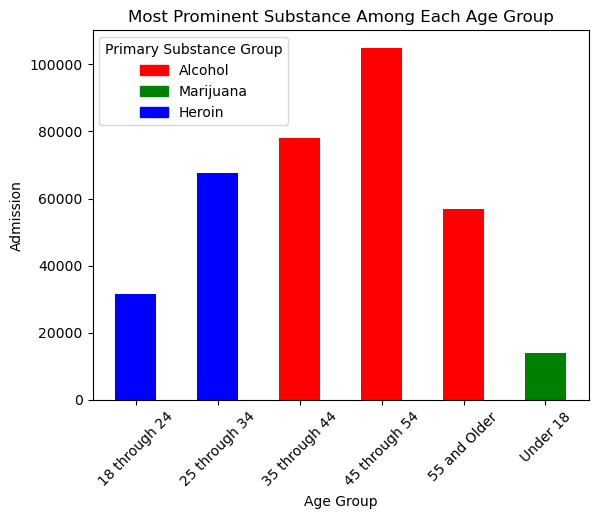

In [25]:
# filter and extract only the rehab facilities
rehab_admissions = treatment_df[treatment_df['Service Type'].str.contains('Rehab|Rehabilitation')]
# group age group and primary substance to see which substance most prominent by admissions
age_substance_count = rehab_admissions.groupby(['Age Group', 'Primary Substance Group'], as_index = False)['Admissions'].sum()
# get max admissions to find most prominent
# used pandas docs for idxmax
prominent_substance = age_substance_count.loc[age_substance_count.groupby('Age Group')['Admissions'].idxmax()]
print(prominent_substance)
#create bar chart
colors = ['red' if substance == 'Alcohol' else 'green' if substance =='Marijuana' else 'blue' if substance == 'Heroin' else 'Black' for substance in prominent_substance['Primary Substance Group']]
plt.bar(prominent_substance['Age Group'], prominent_substance['Admissions'], width = .5, color = colors)
handles = [
    plt.Rectangle((0, 0), 1, 1, color='red'),    # Handle for Alcohol
    plt.Rectangle((0, 0), 1, 1, color='green'),   # Handle for Marijuana
    plt.Rectangle((0, 0), 1, 1, color='blue'),    # Handle for Heroin
     plt.Rectangle((0, 0), 1, 1, color='black')    # Handle for anything else


]
plt.legend(handles, ['Alcohol','Marijuana', 'Heroin'], title = 'Primary Substance Group')

plt.xticks(rotation = 45)
plt.title('Most Prominent Substance Among Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Admission')
plt.show()

The most prominent substance is alcohol for the middle aged groups, as they have the highest number of admissions. While for under 18, they have the lowest number of admissions for marijuana. For ages 18-34, they have the second most highest number of admissions for heroin. The difference between the lowest and highest number of admissions is significant, about 80,000 different.

## Question 7
Using the filtered “rehab” data from question 6 above, identify any patterns in the admission to rehab facilities in any 5 counties and substance groups. Explain your observations.

    County of Program Location Primary Substance Group  Admissions
0                       Albany                 Alcohol        6547
1                       Albany              All Others         435
2                       Albany                 Cocaine        3140
3                       Albany                  Heroin        3656
4                       Albany               Marijuana        1652
..                         ...                     ...         ...
361                      Yates              All Others           0
362                      Yates                 Cocaine           0
363                      Yates                  Heroin           0
364                      Yates               Marijuana           0
365                      Yates           Other Opioids           0

[366 rows x 3 columns]


/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/3404458584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  county_substance_sum = rehab_admissions.groupby(['County of Program Location', 'Primary Substance Group'], as_index = False)['Admissions'].sum()
/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/3404458584.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top5County = county_substance_sum.groupby('County of Program Location')['Admissions'].sum().sort_values(ascending=False).head(5).index
/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_50592/3404458584.py:1

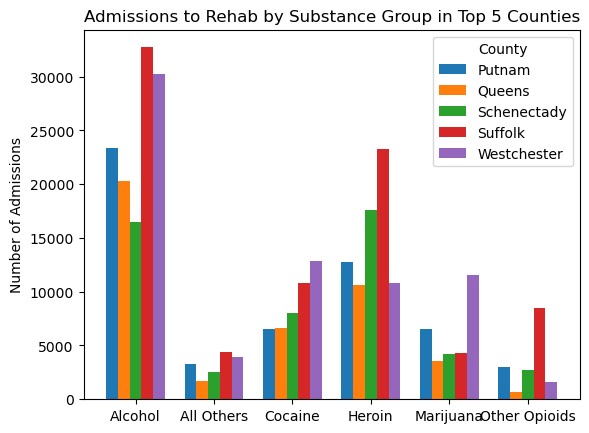

In [28]:
# group county and primary substance to see which substance most prominent by admissions
county_substance_sum = rehab_admissions.groupby(['County of Program Location', 'Primary Substance Group'], as_index = False)['Admissions'].sum()
print(county_substance_sum)
# get the top 5 county that has the most admissions 
top5County = county_substance_sum.groupby('County of Program Location')['Admissions'].sum().sort_values(ascending=False).head(5).index

# Filter the county substance sum to only include top 5 counties
# isin: pandas doc
filtered_data = county_substance_sum[county_substance_sum['County of Program Location'].isin(top5County)]

# Pivot the table for easier plotting (found from reading)
pivot_table = filtered_data.pivot_table(index='Primary Substance Group', columns='County of Program Location', values='Admissions', fill_value=0)

# Create the bar chart (geeksforgeeks plotting multiple bars)
x = np.arange(len(pivot_table.index))  
width = 0.15  # Width of bars
fig, ax = plt.subplots()

for i, county in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[county], width, label=county)

# Add labels and title
ax.set_ylabel('Number of Admissions')
ax.set_title('Admissions to Rehab by Substance Group in Top 5 Counties')
ax.set_xticks(x + width * (len(pivot_table.columns) - 1) / 2)  
ax.set_xticklabels(pivot_table.index)  
ax.legend(title='County')

plt.show()

The top 5 counties with the highest admissions were Putnam, Queens, Schenectady, Suffolk, and Westchester. Alcohol was the biggest primary substance group admissions throughout most of the top 5 county admissions for rehab, besdies Schenectady (though it was bery close). This suggests a significantly higher usage of this substance compared to the other substances, indiating a major issue of alcohol abuse in these regions, with many individuals seeking treatment. On the other hand, all others were the lowest primary substance group admissions amongst most of the top 5 counties. Suffolk has the most admissions throughout all primary substance group, with the biggest number of admissions being alcohol admissions. Heroin is the second highest number of admissions, particularly in Suffolk and Schenectady, indicating a problem with addiction. Queens is has mostly the lowest admissions throughout all the primary substance groups.

## Question 8
Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.


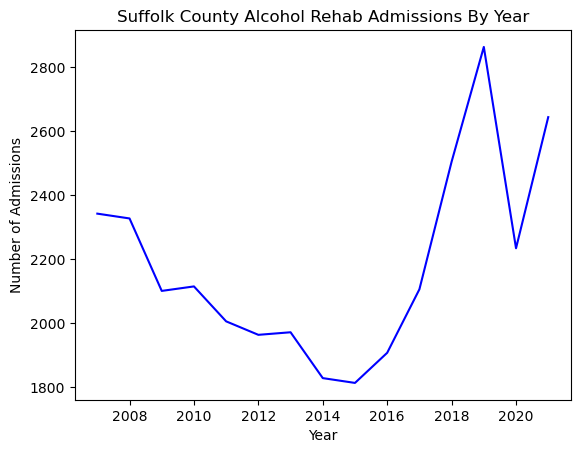

In [31]:
# get only the admissions for suffolk
suffolk_admissions = rehab_admissions[rehab_admissions['County of Program Location'] == 'Suffolk']

# get only the alcohol admissions for suffolk
alcohol_suffolk = suffolk_admissions[suffolk_admissions['Primary Substance Group'] == 'Alcohol']

# group the admissions by year and get the sum of admissions for each year
alcohol_suffolk_year = alcohol_suffolk.groupby(['Year'], as_index = False)['Admissions'].sum()

# create line chart for suffolk for alcohol rehab

plt.plot(alcohol_suffolk_year['Year'], alcohol_suffolk_year['Admissions'], color = 'blue')
plt.title('Suffolk County Alcohol Rehab Admissions By Year')

plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.show()

This line chart visualizes the yearly alcohol rehab admissions trend within Suffolk County. I am demonstrating how the number of alcohol-related admissions has changed over time. By plotting the sum of alcohol-related admissions across different years, we can identify fluctuating trends, that may indicate various things about counties. Based on the result of the line chart, around 2014 to 2015, there is the lowest number of admissions in Suffolk County, which may indicate success of prevention or rehab programs. After this low point, we can visually see that Suffolk county had a significant increase over the years up until 2019. It had the highest alcohol-related admissions, which may suggest a growing need for alcohol rehabilitation services. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
